In [1]:
% initialize MATLAB
clearvars
format compact
syms t L R C i_R(t) v_R(t) i_L(t) v_L(t) v_C(t) i_C(t)

In [2]:
eqvrt = v_R(t) == R * i_R(t)

eqvrt =
v_R(t) == R*i_R(t)


In [3]:
eqirt = isolate(eqvrt,i_R(t))

eqirt =
i_R(t) == v_R(t)/R


In [4]:
eqvlt = v_L(t) == L*diff(i_L(t))

eqvlt =
v_L(t) == L*diff(i_L(t), t)


In [5]:
int(lhs(eqvlt)) == int(rhs(eqvlt));
eqilt = isolate(ans,i_L(t))

eqilt =
i_L(t) == int(v_L(t), t)/L


In [6]:
eqict = i_C(t) == C * diff(v_C(t))

eqict =
i_C(t) == C*diff(v_C(t), t)


In [7]:
int(lhs(eqict)) == int(rhs(eqict));
eqvct = isolate(ans,v_C(t))

eqvct =
v_C(t) == int(i_C(t), t)/C


In [8]:
p = roots([1, 8, 10, 4])

p =
  -6.5708 + 0.0000i
  -0.7146 + 0.3132i
  -0.7146 - 0.3132i


In [9]:
syms s t
y = expand((s - p(2))*(s - p(3)))

y =
s^2 + (804595903579775*s)/562949953421312 + 3086772113315577969665007046981/5070602400912917605986812821504


In [10]:
y = sym2poly(y)

y =
    1.0000    1.4292    0.6088


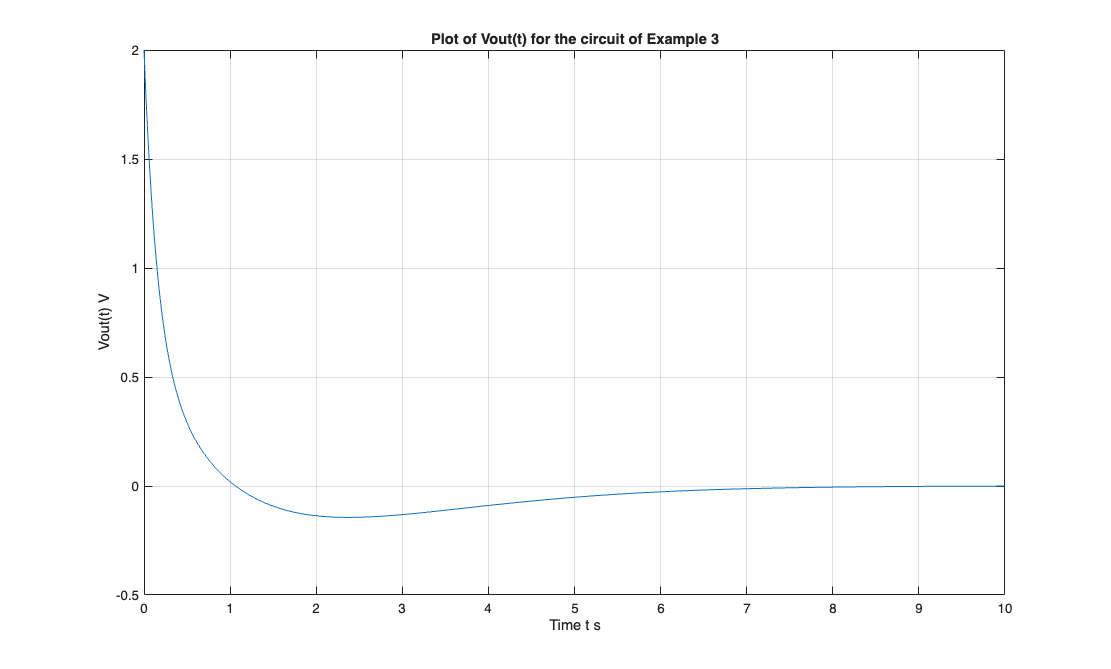

In [11]:
t=0:0.01:10;
Vout = 1.36.*exp(-6.57.*t)...
   +0.64.*exp(-0.715.*t).*cos(0.316.*t)...
   -1.84.*exp(-0.715.*t).*sin(0.316.*t);
plot(t, Vout); grid
title('Plot of Vout(t) for the circuit of Example 3')
ylabel('Vout(t) V'),xlabel('Time t s')

In [12]:
Vout = tf(2*conv([1, 0],[1, 3]),[1, 8, 10, 4])


Vout =
 
       2 s^2 + 6 s
  ----------------------
  s^3 + 8 s^2 + 10 s + 4
 
Continuous-time transfer function.


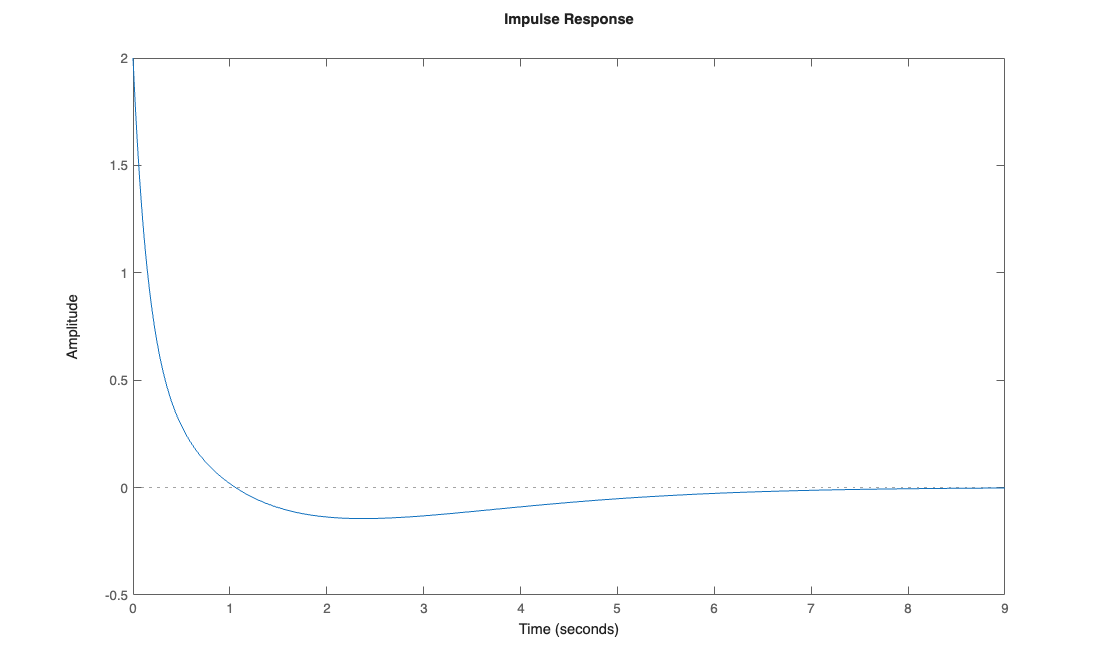

In [13]:
impulse(Vout)

In [14]:
syms s;

z1 = 13*s + 8/s;
z2 = 5*s + 10;
z3 = 20 + 16/s;

In [15]:
z = z1 + z2 * z3 /(z2 + z3)

z =
13*s + 8/s + ((5*s + 10)*(16/s + 20))/(5*s + 16/s + 30)


In [16]:
z10 = simplify(z)

z10 =
(65*s^4 + 490*s^3 + 528*s^2 + 400*s + 128)/(s*(5*s^2 + 30*s + 16))


In [17]:
pretty(z10)

    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128
-------------------------------------
               2
         s (5 s  + 30 s + 16)



In [18]:
y10 = 1/z10;
pretty(y10)

               2
         s (5 s  + 30 s + 16)
-------------------------------------
    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128

